###  House Prices: Advanced Regression Techniques

#### Competition Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
#### Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting
#### Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

---
### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset
##### for this problem we will be loading training set and test  from two files as given by kaggle 

In [1]:
import os
import math
import datetime
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import (load_data, print_dataset_info, split_dataset, 
                              auto_scatter_simple,load_dataset,detect_outliers,
                              one_hot_dataframe)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

pd.set_option('display.width', 200)
pd.set_option('precision', 4)

sns.set_style("whitegrid")

sns.set_palette(sns.color_palette("muted", 15))

In [2]:
load_app_config()
DIRECTORY="kaggle_housing"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'SalePrice'
input_path = get_datafolder_path()

train_file = os.path.join(input_path, DIRECTORY, TRAIN_FILE)
test_file = os.path.join(input_path, DIRECTORY, TEST_FILE)
print(train_file)
print(test_file)

train_dataset,feature_columns,response_column,continuous_predictors,categorical_predictors = load_dataset(train_file,RESPONSE)
test_dataset,tfeature_columns,tresponse_column,tcontinuous_predictors,tcategorical_predictors  = load_dataset(test_file,RESPONSE,colseparator=',')

train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]
test_X  = test_dataset[tfeature_columns]


Adding F:\MachineLearning  to system path
Adding F:\DataSource  to system path
F:\DataSource\kaggle_housing\train.csv
F:\DataSource\kaggle_housing\test.csv
 input file is :F:\DataSource\kaggle_housing\train.csv loaded.
Continous Variables
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Variables
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2n

#### Distribution of Target Variable

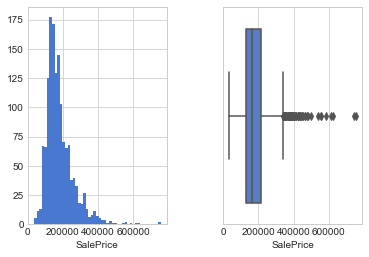

In [3]:
fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(1,2, 1)
sns.distplot(train_dataset[response_column[0]],ax=ax1 ,kde =False,hist_kws=dict(alpha=1))
ax2 = fig.add_subplot(1,2, 2)
sns.boxplot(x=train_dataset[response_column[0]],ax=ax2)
plt.show()

In [4]:

print(train_dataset[response_column[0]].describe())
print("Median of Sale Price:{0}".format(train_dataset[response_column[0]].median()) )

count      1460.0000
mean     180921.1959
std       79442.5029
min       34900.0000
25%      129975.0000
50%      163000.0000
75%      214000.0000
max      755000.0000
Name: SalePrice, dtype: float64
Median of Sale Price:163000.0


In [5]:
train_dataset[train_dataset.columns[0:40]].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
count,1460.00,1460.0000,1201.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1452.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,730.50,56.8973,70.0500,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.6853,443.6397,46.5493,567.2404,1057.4295
std,421.61,42.3006,24.2848,9981.2649,1.3830,1.1128,30.2029,20.6454,181.0662,456.0981,161.3193,441.8670,438.7053
min,1.00,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,365.75,20.0000,59.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,0.0000,223.0000,795.7500
50%,730.50,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,0.0000,477.5000,991.5000
75%,1095.25,70.0000,80.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,166.0000,712.2500,0.0000,808.0000,1298.2500
max,1460.00,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000


In [6]:
train_dataset[train_dataset.columns[40:]].describe()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,...,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.000,1460.0000,1460.0000,1460.0000
mean,1162.6267,346.9925,5.8445,1515.4637,0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,...,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.489,6.3219,2007.8158,180921.1959
std,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,...,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.123,2.7036,1.3281,79442.5029
min,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,1.0000,2006.0000,34900.0000
25%,882.0000,0.0000,0.0000,1129.5000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,5.0000,2007.0000,129975.0000
50%,1087.0000,0.0000,0.0000,1464.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,...,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.000,6.0000,2008.0000,163000.0000
75%,1391.2500,728.0000,0.0000,1776.7500,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,...,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.000,8.0000,2009.0000,214000.0000
max,4692.0000,2065.0000,572.0000,5642.0000,3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,...,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.000,12.0000,2010.0000,755000.0000


In [7]:
check_null = train_dataset.isnull().sum()[train_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"Train Dataset null value count"))
print(check_null.sort_values(ascending=False))

check_null = test_dataset.isnull().sum()[test_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"Test Dataset null value count"))
check_null.sort_values(ascending=False)

<=================================== Train Dataset null value count ===================================>
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
<=================================== Test Dataset null value count ===================================>


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [8]:
continuous  =['LotFrontage', 'LotArea','MasVnrArea','TotalBsmtSF','TotRmsAbvGrd',
              'LowQualFinSF', 'GrLivArea','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','1stFlrSF','BsmtFinSF2','BsmtFinSF1','2ndFlrSF',
              'BsmtUnfSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

ordinal_predictors =['GarageYrBlt','YearRemodAdd','YearBuilt','YrSold','MSSubClass',
                     'OverallQual','OverallCond','MoSold','BsmtFullBath', 'BsmtHalfBath', 
                     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr']
for predictor in ordinal_predictors:
    if predictor in continuous_predictors:
        continuous_predictors.remove(predictor)
        categorical_predictors.append(predictor)
    else:
        print("Not  found:{0}".format(predictor))
    
print(continuous_predictors) 
print(categorical_predictors)

print(len(continuous_predictors) +len(categorical_predictors) )


['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'YrSold', 'MSSubClass', 'OverallQual', 'OverallCond'

#### As shown above predictors having NA  mean like Not applicable,No Alley Access.Refer to Ames housing metadata more details

In [9]:
full_dataset =pd.concat(objs=[train_dataset, test_dataset], axis=0).reset_index(drop=True)

check_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"Full Dataset null value count"))
print(check_null)

null_category = list(set(check_null.index) & set(categorical_predictors))
non_null_category  = set(categorical_predictors) -set(null_category) 
print("Categorical values having null")
print(null_category)
default_NA_category= {'Functional':'Not Applicable','MasVnrType':'Not Applicable','MiscFeature':'Not Applicable',
                      'Fence':'No Fence','PoolQC': 'No Pool','Alley':'No Alley Access',
                      'GarageCond':'No Garage','BsmtCond':'No Basement', 'BsmtFinType1':'No Basement',
                      'GarageType':'No Garage','KitchenQual':'Not Rated','FireplaceQu':'No Fire Place',
                      'MSZoning':'No Zone','Electrical':'Not specified','GarageQual':'No Garage',
                      'Utilities':'Not Specified','GarageFinish':'No Garage','BsmtFinType2':'No Basement',
                      'Exterior2nd':'Not Specified ','BsmtExposure':'No Basement','BsmtQual':'No Basement',
                      'Exterior1st': 'Not Specified','SaleType':'Not Specified','GarageYrBlt':-1,
                      'BsmtHalfBath':-1,'BsmtFullBath':-1
                     }
for item in null_category:
    full_dataset[item].fillna(default_NA_category[item], inplace=True)
    


<=================================== Full Dataset null value count ===================================>
Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64
Categorical values having null
['GarageQual', 'FireplaceQu', 'GarageCond', 'GarageYrBlt', 'Utilities', 'Exterior1st', 'GarageType', 'GarageFinish', 

In [10]:
check_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"Full Dataset null value count"))
print(check_null)
train_dataset =full_dataset[full_dataset['SalePrice'].notnull()]
test_dataset =full_dataset[full_dataset['SalePrice'].isnull()]

<=================================== Full Dataset null value count ===================================>
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
GarageArea        1
GarageCars        1
LotFrontage     486
MasVnrArea       23
SalePrice      1459
TotalBsmtSF       1
dtype: int64


#### Univariate Analysis

In [11]:
#checkpoint#1

In [12]:
def dist_plots(dataset,continuous_features):
    fig = plt.figure(figsize=(12, 8),dpi=300)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(3,4, i+1)
        sns.distplot(dataset[dataset[continuous_features[i]].notnull()][continuous_features[i]],ax=ax ,
                     kde =False,hist_kws=dict(alpha=1))
        sns.despine()
    plt.tight_layout()
    plt.show()


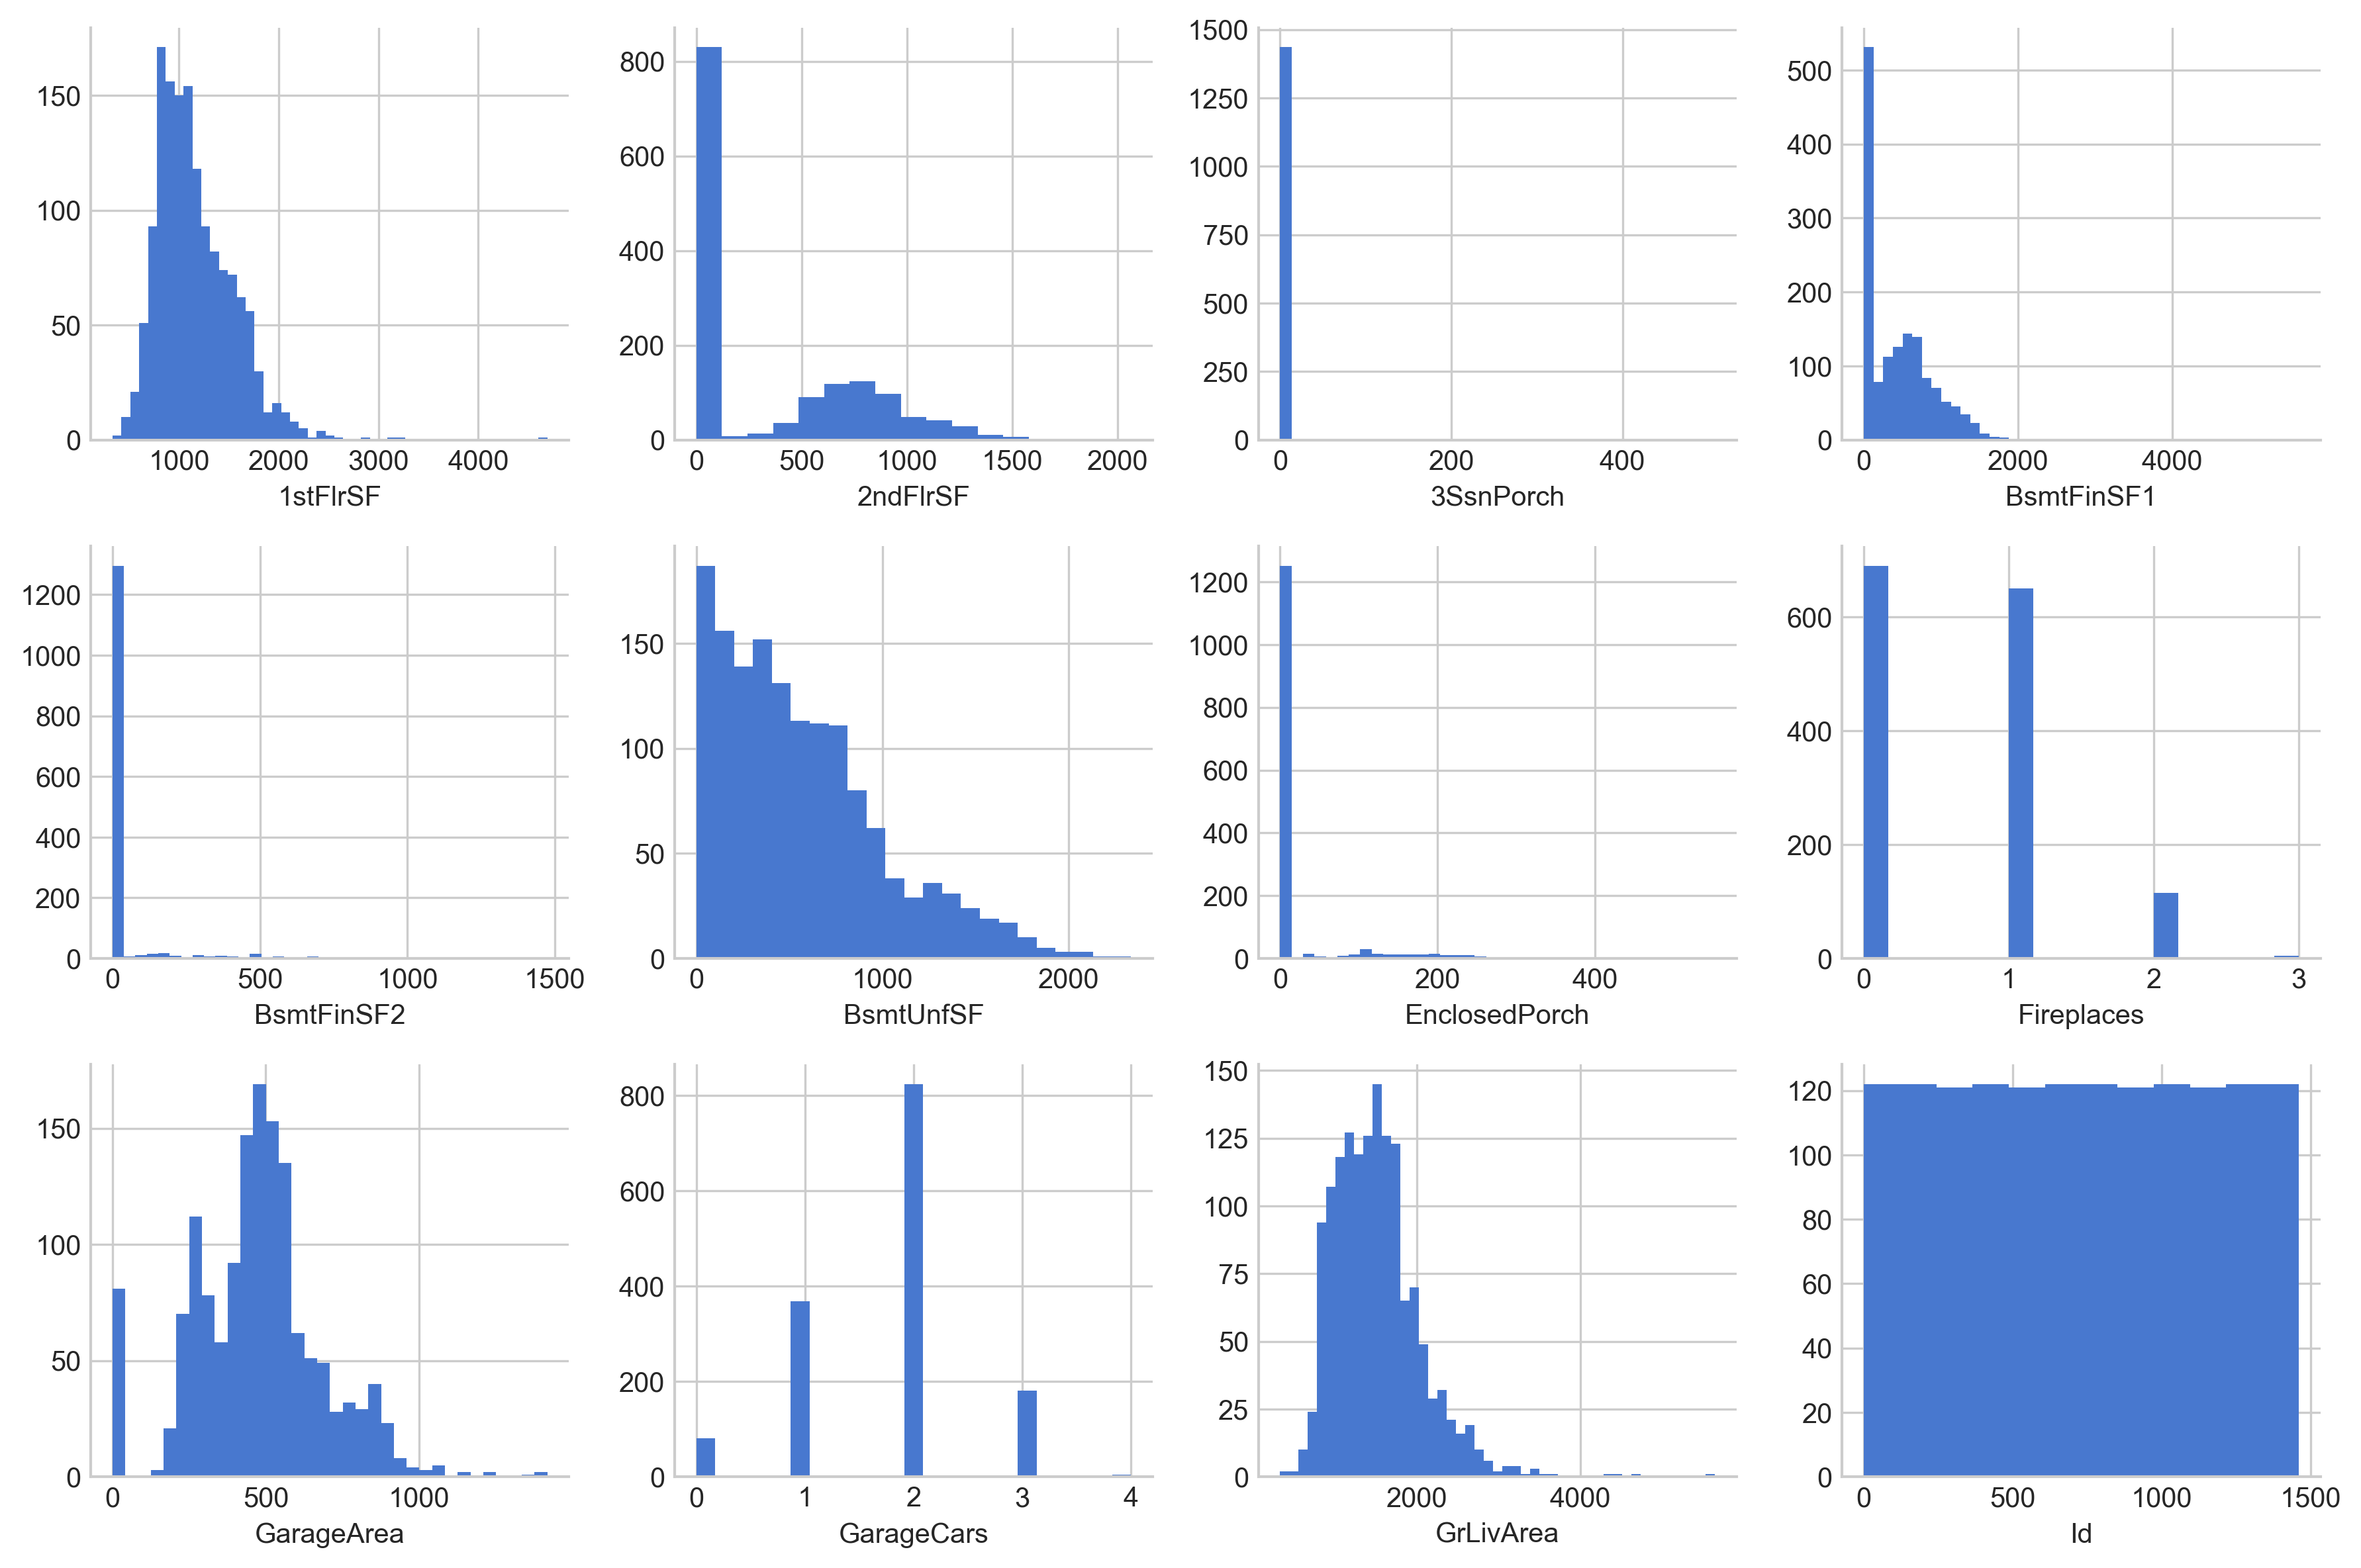

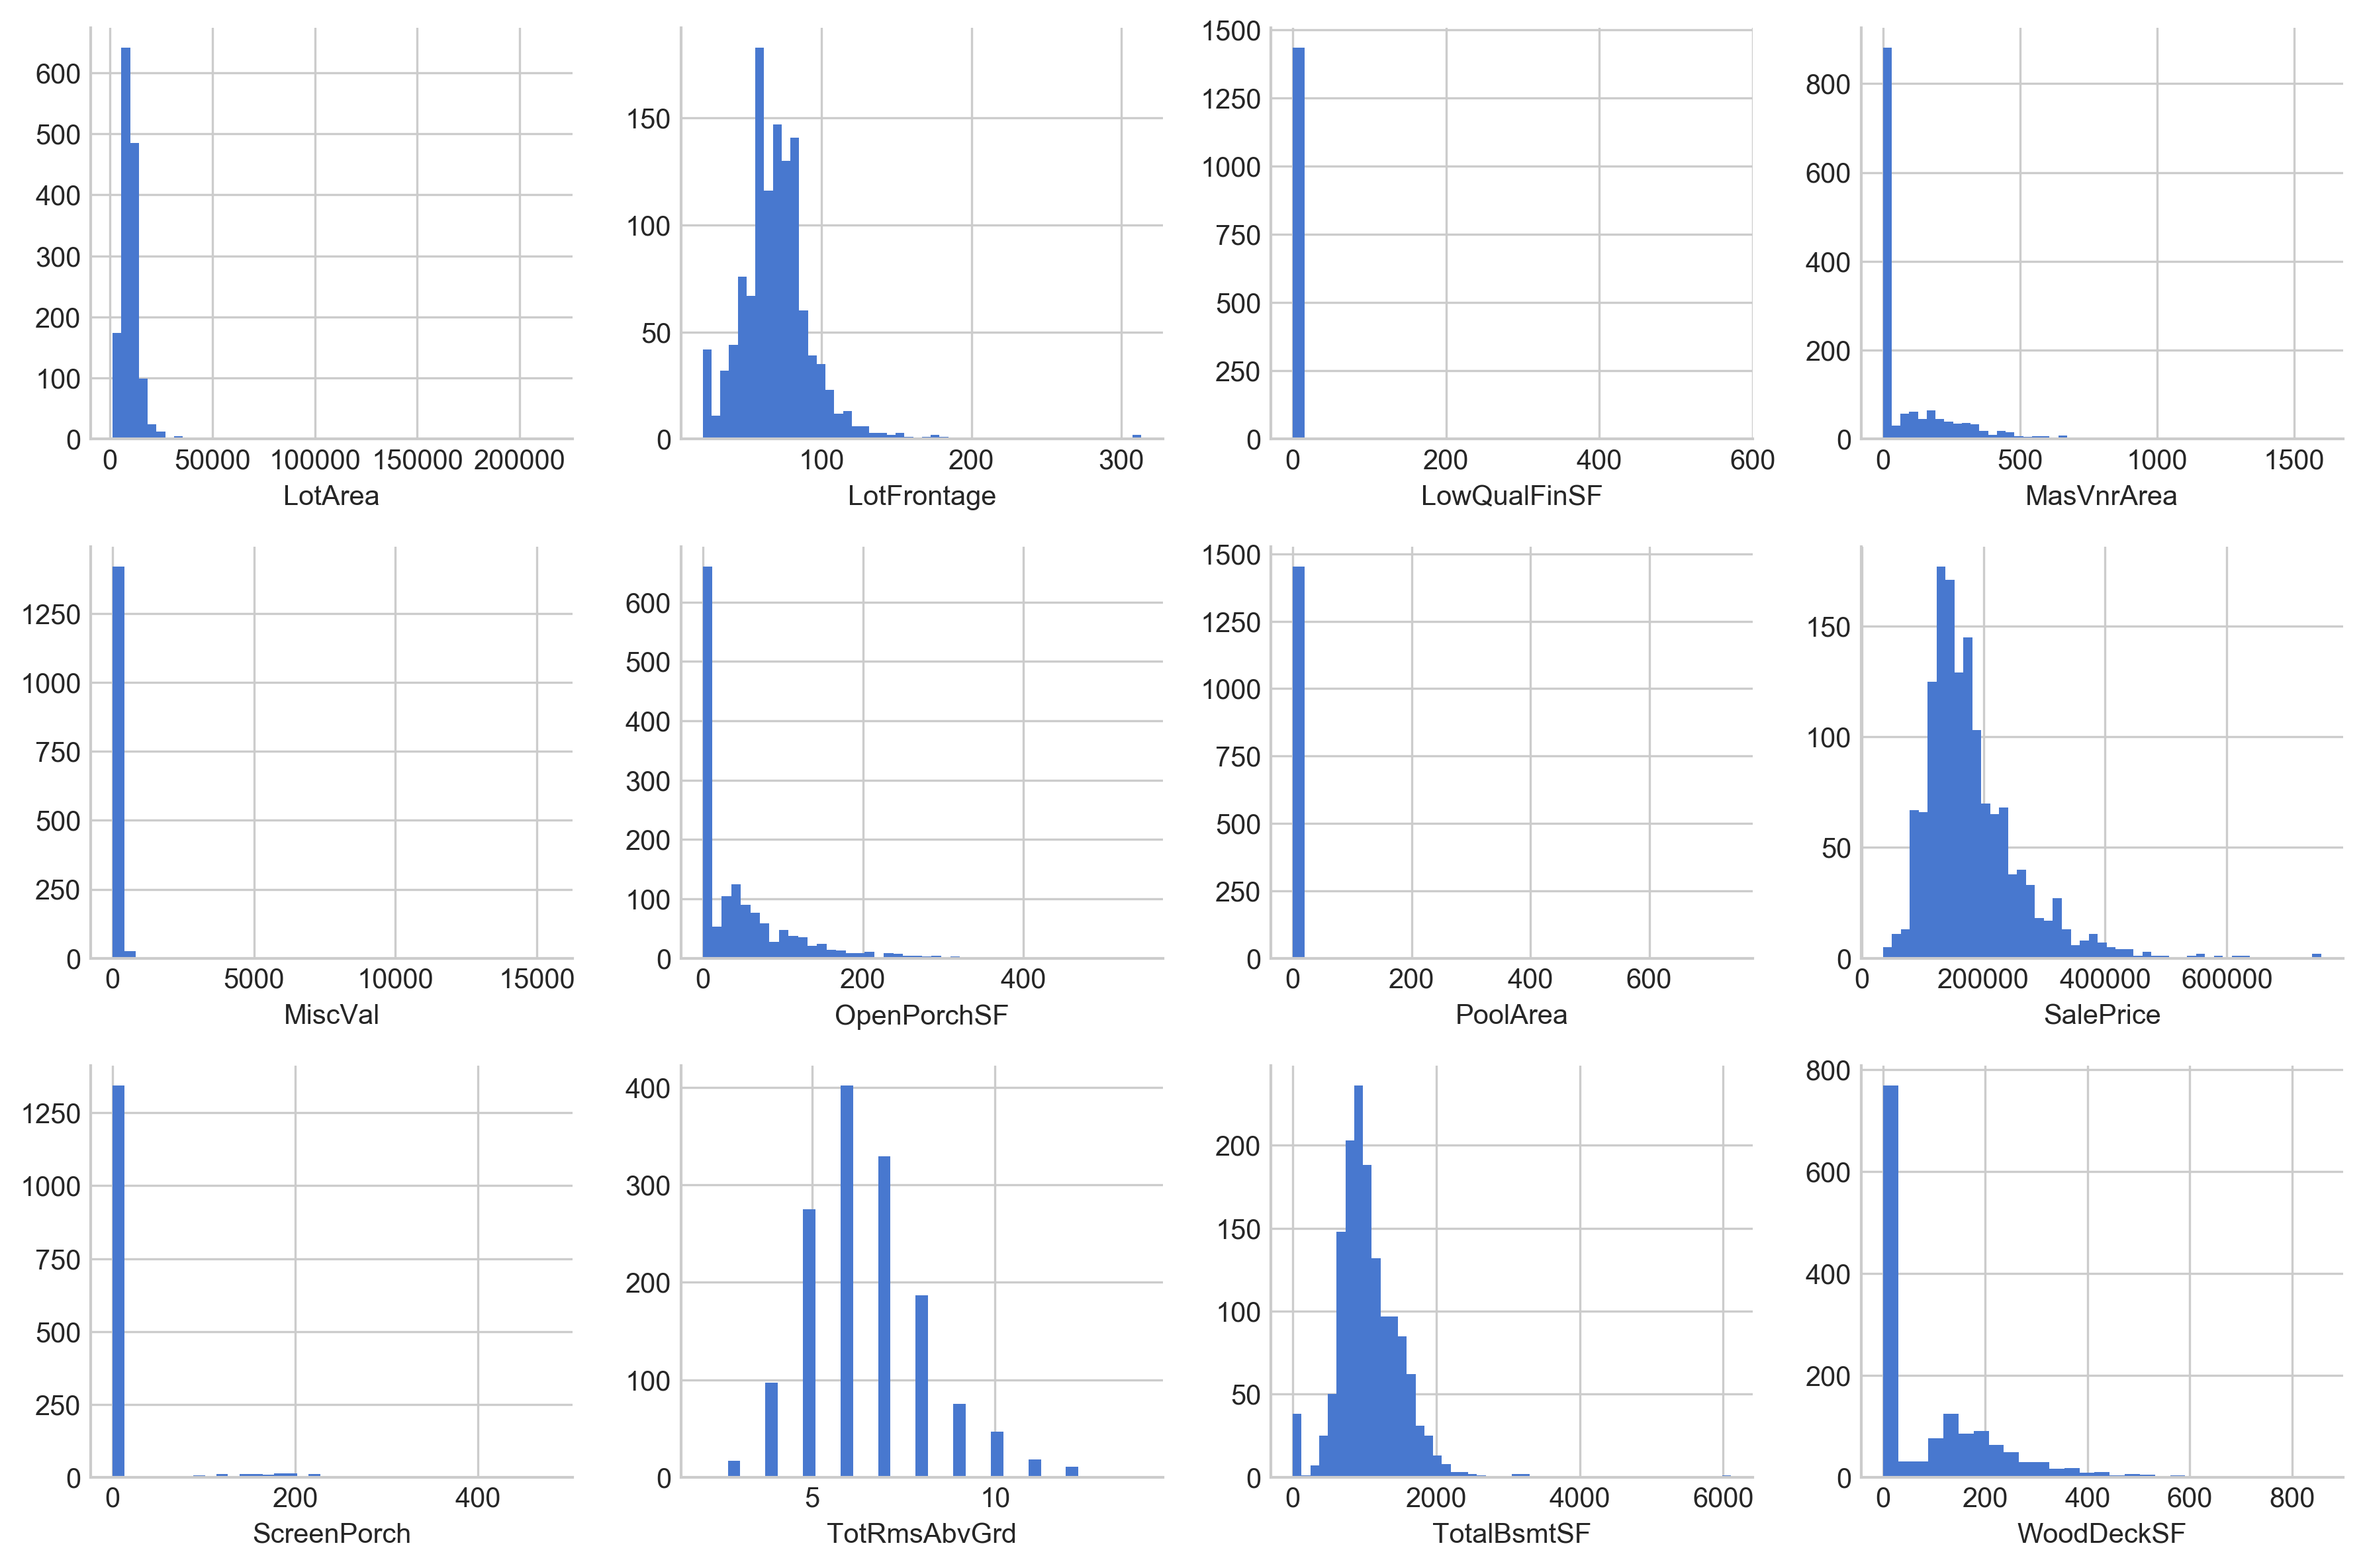

In [13]:
continuous_predictors =sorted(continuous_predictors)
dist_plots(train_dataset,continuous_predictors[:12])
dist_plots(train_dataset,continuous_predictors[12:])


In [14]:
#ax = sns.countplot(x="MSSubClass", data=train_dataset)
def bar_plots(dataset,categorical_features,response):
    fig = plt.figure(figsize=(15, 12),dpi=300)
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    size =len(categorical_features)
     
    for i in range(size):
        ax = fig.add_subplot(3,4, i+1)
        sns.barplot( x =categorical_features[i],y=response,data=dataset,ax=ax )
                     
        sns.despine()
    plt.tight_layout()
    plt.show()


In [15]:
categorical_predictors =sorted(categorical_predictors)
categorical_predictors 

['Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'MoSold',
 'Neighborhood',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [16]:
#bar_plots(train_dataset,categorical_predictors[0:12],response_column[0])

In [17]:
#bar_plots(train_dataset,categorical_predictors[12:24],response_column[0])

In [18]:
#bar_plots(train_dataset,categorical_predictors[24:36],response_column[0])

In [19]:
#bar_plots(train_dataset,categorical_predictors[36:48],response_column[0])

In [20]:
#bar_plots(train_dataset,categorical_predictors[48:],response_column[0])

In [21]:
full_dataset =pd.concat(objs=[train_dataset, test_dataset], axis=0).reset_index(drop=True)


In [22]:
print(full_dataset['Neighborhood'].unique())
neighborhood = { value:item for item,value in enumerate(sorted(full_dataset['Neighborhood'].unique() ))  }
full_dataset['Neighborhood'] =full_dataset['Neighborhood'].map(neighborhood)
print(full_dataset['Neighborhood'].unique())

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
[ 5 24  6 15 11 21 14 17  3 19 16 12 20  9 10  7 23  8 22  4 13  0  2 18  1]


In [23]:
print(full_dataset['Exterior1st'].unique())
neighborhood = { value:item for item,value in enumerate(sorted(full_dataset['Exterior1st'].unique() ))  }
full_dataset['Exterior1st'] =full_dataset['Exterior1st'].map(neighborhood)
print(full_dataset['Exterior1st'].unique())

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' 'Not Specified']
[13  8 14  6  3 15  5 10  0 12  2  1 11  7  4  9]


In [24]:
print(full_dataset['Exterior2nd'].unique())
neighborhood = { value:item for item,value in enumerate(sorted(full_dataset['Exterior2nd'].unique() ))  }
full_dataset['Exterior2nd'] =full_dataset['Exterior2nd'].map(neighborhood)
print(full_dataset['Exterior2nd'].unique())

['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone' 'Other'
 'CBlock' 'Not Specified ']
[14  8 16  6 11 15  5  3 13  0  2  7  1 12 10  4  9]


In [25]:
print(full_dataset['ExterQual'].unique())
exter_quality = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2 }
full_dataset['ExterQual'] =full_dataset['ExterQual'].map(exter_quality)
print(full_dataset['ExterQual'].unique())

['Gd' 'TA' 'Ex' 'Fa']
[4 3 5 2]


In [26]:
print(full_dataset['ExterCond'].unique())
exter_condition = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2 }
full_dataset['ExterCond'] =full_dataset['ExterCond'].map(exter_condition)
print(full_dataset['ExterCond'].unique())

['TA' 'Gd' 'Fa' 'Po' 'Ex']
[3 4 2 1 5]


In [27]:
#BsmtQual
print(full_dataset['BsmtQual'].unique())
BsmtQual = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2 ,'No Basement':0}
full_dataset['BsmtQual'] =full_dataset['BsmtQual'].map(BsmtQual)
print(full_dataset['BsmtQual'].unique())

['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
[4 3 5 0 2]


In [28]:
print(full_dataset['BsmtCond'].unique())
bsmt_condition = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2 ,'No Basement':0}
full_dataset['BsmtCond'] =full_dataset['BsmtCond'].map(bsmt_condition)
print(full_dataset['BsmtCond'].unique())

['TA' 'Gd' 'No Basement' 'Fa' 'Po']
[3 4 0 2 1]


In [29]:
print(full_dataset['BsmtExposure'].unique())
bsmt_exposure = {'Po':1 ,'No':4 ,'Mn' :3,'Ex':5 ,'Av':2 ,'No Basement':0,'Gd':5}
full_dataset['BsmtExposure'] =full_dataset['BsmtExposure'].map(bsmt_exposure)
print(full_dataset['BsmtExposure'].unique())

['No' 'Gd' 'Mn' 'Av' 'No Basement']
[4 5 3 2 0]


In [30]:
print(full_dataset['BsmtFinType1'].unique())
bsmtFinType1_rating = {'Unf':1 ,'BLQ':4 ,'Rec' :3,'ALQ' :5 ,'LwQ':2 ,'No Basement':0,'GLQ':6}
full_dataset['BsmtFinType1'] =full_dataset['BsmtFinType1'].map(bsmtFinType1_rating)
print(full_dataset['BsmtFinType1'].unique())

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']
[6 5 1 3 4 0 2]


In [31]:
print(full_dataset['BsmtFinType2'].unique())
full_dataset['BsmtFinType2'] =full_dataset['BsmtFinType2'].map(bsmtFinType1_rating)
print(full_dataset['BsmtFinType2'].unique())

['Unf' 'BLQ' 'No Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ']
[1 4 0 5 3 2 6]


In [32]:
print(full_dataset['HeatingQC'].unique())
HeatingQC = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2,'Not Rate' :0}
full_dataset['HeatingQC'] =full_dataset['HeatingQC'].map(HeatingQC)
print(full_dataset['HeatingQC'].unique())

['Ex' 'Gd' 'TA' 'Fa' 'Po']
[5 4 3 2 1]


In [33]:
print(full_dataset['KitchenQual'].unique())
KitchenQual = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2 ,'Ex':5,'Not Rated':0}
full_dataset['KitchenQual'] =full_dataset['KitchenQual'].map(KitchenQual)
print(full_dataset['KitchenQual'].unique())

['Gd' 'TA' 'Ex' 'Fa' 'Not Rated']
[4 3 5 2 0]


In [34]:
#FireplaceQu
print(full_dataset['FireplaceQu'].unique())
FireplaceQu = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2 ,'Ex':5,'No Fire Place':0}
full_dataset['FireplaceQu'] =full_dataset['FireplaceQu'].map(FireplaceQu)
print(full_dataset['FireplaceQu'].unique())

['No Fire Place' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[0 3 4 2 5 1]


In [35]:
print(full_dataset['GarageQual'].unique())
GarageQual = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2 ,'Ex':5,'No Garage':0}
full_dataset['GarageQual'] =full_dataset['GarageQual'].map(GarageQual)
print(full_dataset['GarageQual'].unique())

['TA' 'Fa' 'Gd' 'No Garage' 'Ex' 'Po']
[3 2 4 0 5 1]


In [36]:
print(full_dataset['GarageCond'].unique())
GarageCond = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2 ,'Ex':5,'No Garage':0}
full_dataset['GarageCond'] =full_dataset['GarageCond'].map(GarageCond)
print(full_dataset['GarageCond'].unique())

['TA' 'Fa' 'No Garage' 'Gd' 'Po' 'Ex']
[3 2 0 4 1 5]


In [37]:
print(full_dataset['PoolQC'].unique())
PoolQC = {'Po':1 ,'Gd':4 ,'TA' :3,'Ex':5 ,'Fa':2 ,'Ex':5,'No Pool':0}
full_dataset['PoolQC'] =full_dataset['PoolQC'].map(PoolQC)
print(full_dataset['PoolQC'].unique())

['No Pool' 'Ex' 'Fa' 'Gd']
[0 5 2 4]


In [38]:
print(full_dataset['Fence'].unique())
Fence = {'No Fence':0,'MnWw':1 ,'GdWo' :2,'MnPrv':3 ,'GdPrv':4 }
full_dataset['Fence'] =full_dataset['Fence'].map(Fence)
print(full_dataset['Fence'].unique())

['No Fence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[0 3 2 4 1]


In [39]:
ordinal_category=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                  'BsmtFinType2','HeatingQC','KitchenQual','GarageQual','FireplaceQu','GarageCond','PoolQC','Fence']
print(len(ordinal_category))
 

16


In [40]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null int64
BsmtExposure     2919 non-null int64
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2919 non-null int64
BsmtFinType2     2919 non-null int64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null int64
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      2919 non-

In [41]:
full_dataset[( (full_dataset['PoolQC']==0) & (full_dataset['PoolArea']!=0) )]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2420,1647,0,0,No Alley Access,3,1Fam,3,4,595.0,354.0,...,WD,0,Pave,6,1105.0,AllPub,225,1953,1953,2007
2503,1105,717,0,No Alley Access,4,1Fam,3,4,0.0,0.0,...,WD,0,Pave,7,1105.0,AllPub,0,1984,1984,2007
2599,2034,0,0,No Alley Access,2,1Fam,0,0,0.0,0.0,...,WD,0,Pave,9,0.0,AllPub,483,1953,1953,2007


In [42]:
poolqc_median=full_dataset[( (full_dataset['PoolQC']!=0) & (full_dataset['PoolArea']!=0) )].groupby(['PoolQC'])['PoolArea'].median()
print(poolqc_median)
full_dataset.loc[2420,'PoolQC'] = 5
full_dataset.loc[2503,'PoolQC'] = 5
full_dataset.loc[2599,'PoolQC'] = 2

PoolQC
2    583.5
4    657.0
5    370.0
Name: PoolArea, dtype: float64


In [43]:
median_LotFrontage =full_dataset[full_dataset['LotFrontage'].notnull()].groupby(['Neighborhood'])['LotFrontage'].median()
median_LotFrontage

def fill_missing_LotFrontage(row):
    if pd.isnull(row['LotFrontage']):
        return median_LotFrontage[row['Neighborhood']]
    else:
        return row['LotFrontage']
    
full_dataset['LotFrontage']=full_dataset.apply(fill_missing_LotFrontage,axis=1) 


In [44]:
full_dataset['BsmtFinSF1'].fillna(0, inplace=True)
full_dataset['BsmtFinSF2'].fillna(0, inplace=True)
full_dataset['TotalBsmtSF'].fillna(0, inplace=True)
full_dataset['BsmtUnfSF'].fillna(0, inplace=True)
full_dataset['GarageArea'].fillna(0, inplace=True)
full_dataset['GarageCars'].fillna(0, inplace=True)
full_dataset['MasVnrArea'].fillna(0, inplace=True)

In [45]:
check_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*35,"Full Dataset null value count"))
print(check_null)
full_dataset.shape

<=================================== Full Dataset null value count ===================================>
SalePrice    1459
dtype: int64


(2919, 81)

In [46]:
area_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]
full_dataset["TotalArea"] = full_dataset[area_columns].sum(axis=1)
full_dataset["Log_TotalArea"] = np.log(full_dataset["TotalArea"])
full_dataset.drop(area_columns,axis =1,inplace=True)
full_dataset[["TotalArea","Log_TotalArea"]].head()
continuous_predictors = list(set(continuous_predictors) - set(area_columns))
if "Log_TotalArea" not in continuous_predictors:
    continuous_predictors.append('Log_TotalArea')
if "TotalArea" not in continuous_predictors:
    continuous_predictors.append('TotalArea')
continuous_predictors


['Id',
 'MiscVal',
 'TotRmsAbvGrd',
 'Fireplaces',
 'SalePrice',
 'GarageCars',
 'Log_TotalArea',
 'TotalArea']

In [47]:
print(sorted(full_dataset['Condition1'].unique()))
print(sorted(full_dataset['Condition2'].unique()))
 

['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn']
['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn']


In [48]:
def dual_advantage(conditions):
    Condition1,Condition2 = conditions
    if (Condition1==Condition2):
        return 0
    else: 
        return 1
    
full_dataset['Dual_Conditions']  =   full_dataset[['Condition1','Condition2']].apply(dual_advantage,axis=1)

In [49]:
full_dataset[['Condition1','Condition2','Dual_Conditions']].head()

,Condition1,Condition2,Dual_Conditions
0,Norm,Norm,0
1,Feedr,Norm,1
2,Norm,Norm,0
3,Norm,Norm,0
4,Norm,Norm,0


In [50]:
final_categorical =list(set(categorical_predictors)-set(ordinal_category))
 

In [51]:
full_dataset['YearBuilt']  =full_dataset['YearBuilt'].astype(int)
full_dataset['YearRemodAdd']  =full_dataset['YearRemodAdd'].astype(int)
full_dataset['YrSold']  =full_dataset['YrSold'].astype(int)

def remodelled(years):
    built_year,remodelled_year=years
    return int(built_year !=remodelled_year)

full_dataset["Is_Remodelled"] =full_dataset[["YearBuilt","YearRemodAdd"]].apply(remodelled,axis=1)
full_dataset["Is_New"] =full_dataset[["YearBuilt","YrSold"]].apply(lambda row: int(row["YearBuilt"]==row["YrSold"]),axis=1)
'''
FORMAT = '%Y%m%d%H%M%S'
timestamp=datetime.datetime.now().strftime(FORMAT)
filename ="housing"+timestamp+"_input.csv"
full_dataset.to_csv(filename, index=False)
full_dataset.head(10)
'''

'\nFORMAT = \'%Y%m%d%H%M%S\'\ntimestamp=datetime.datetime.now().strftime(FORMAT)\nfilename ="housing"+timestamp+"_input.csv"\nfull_dataset.to_csv(filename, index=False)\nfull_dataset.head(10)\n'

In [52]:
#full_dataset,full_dataset_ignore = one_hot_dataframe(full_dataset, final_categorical, replace=True)
### From orange

selected_category = ['Neighborhood','HouseStyle','Exterior1st','Exterior2nd','GarageFinish',
                     'LotConfig','GarageType','BldgType','Foundation','MSZoning','MasVnrType',
                     'Is_Remodelled','LotShape','SaleCondition','Alley','RoofStyle','LandContour',
                     'Condition1','Electrical','CentralAir','Dual_Conditions','Functional',
                     'PavedDrive','Condition2','SaleType']
final_categorical = list(set(final_categorical) & set(selected_category))
final_categorical.remove('Neighborhood')
final_categorical.remove('Exterior1st')
final_categorical.remove('Exterior2nd')

In [53]:
print(final_categorical)

['LotShape', 'GarageFinish', 'GarageType', 'LandContour', 'Condition2', 'MSZoning', 'BldgType', 'Functional', 'SaleType', 'CentralAir', 'Foundation', 'RoofStyle', 'HouseStyle', 'SaleCondition', 'Electrical', 'PavedDrive', 'LotConfig', 'MasVnrType', 'Alley', 'Condition1']


In [54]:
full_dataset,full_dataset_ignore = one_hot_dataframe(full_dataset, final_categorical, replace=True)

In [55]:
print(full_dataset.info())
to_be_dropped=full_dataset.select_dtypes(include=['object']) 
drop_columns  = list(to_be_dropped.columns)
print(drop_columns)
full_dataset =full_dataset.drop(drop_columns,axis=1)
cdrop_columns = ['PoolQC','MSSubClass','MoSold','ExterCond','YrSold','OverallCond','MiscVal','BsmtFinType2','BsmtHalfBath']
full_dataset =full_dataset.drop(cdrop_columns,axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 163 entries, BedroomAbvGr to SaleType=WD
dtypes: float64(122), int32(3), int64(32), object(6)
memory usage: 3.6+ MB
None
['Heating', 'LandSlope', 'MiscFeature', 'RoofMatl', 'Street', 'Utilities']


In [56]:
#checkpoint
'''
FORMAT = '%Y%m%d%H%M%S'
timestamp=datetime.datetime.now().strftime(FORMAT)
filename ="housing"+timestamp+"_input.csv"
full_dataset.to_csv(filename, index=False)
'''
#print(sorted(categorical_predictors))
#print(sorted(ordinal_category))
print(full_dataset.info())
#print(list(full_dataset.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 148 entries, BedroomAbvGr to SaleType=WD
dtypes: float64(121), int32(2), int64(25)
memory usage: 3.3 MB
None


In [57]:
checkpoint

NameError: name 'checkpoint' is not defined

In [58]:
from sklearn.model_selection  import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model  import Ridge,RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
 
test_size = 0.33
seed = 7

train_dataset =full_dataset[full_dataset['SalePrice'].notnull()]
print(train_dataset['SalePrice'].head())
 
train_dataset['SalePrice'] =  np.log1p(train_dataset['SalePrice'])
print(train_dataset['SalePrice'].head())
test_dataset =full_dataset[full_dataset['SalePrice'].isnull()]
print(train_dataset.shape)
train_dataset.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64
0    12.2477
1    12.1090
2    12.3172
3    11.8494
4    12.4292
Name: SalePrice, dtype: float64
(1460, 148)


F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtQual,ExterQual,Exterior1st,Exterior2nd,Fence,...,SaleType=COD,SaleType=CWD,SaleType=Con,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Not Specified,SaleType=Oth,SaleType=WD
0,3,3,4,6,1.0,4,4,13,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,3,5,5,0.0,4,3,8,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,3,3,6,1.0,4,4,13,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,4,4,5,1.0,3,3,14,16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,3,2,6,1.0,4,4,13,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
drop_features = ['Id','SalePrice','TotalArea']
print(drop_features)

train_y = train_dataset['SalePrice']

train_Id  =train_dataset["Id"]
test_Id =test_X["Id"]

train_X = train_dataset.drop(drop_features,axis=1)
test_X = test_dataset.drop(drop_features,axis=1)
 

print(train_X.shape)
print(test_X.shape)

X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(train_X, train_y, test_size=test_size,random_state=seed)

['Id', 'SalePrice', 'TotalArea']
(1460, 145)
(1459, 145)


In [60]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [61]:
test_X.info()
check_null = test_X.isnull().sum()[test_X.isnull().sum()>0] 
print(check_null)
X_train_select = X_trainmodel
X_val_select = X_val
X_test_select =  test_X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1460 to 2918
Columns: 145 entries, BedroomAbvGr to SaleType=WD
dtypes: float64(119), int32(2), int64(24)
memory usage: 1.6 MB
Series([], dtype: int64)


In [62]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
'''
select = SelectFromModel(RandomForestRegressor( n_estimators=200, random_state=42,
                                                min_samples_leaf=3,min_samples_split=3)
                                                ,threshold="median")



from sklearn.feature_selection import RFE
select = RFE(RandomForestRegressor( n_estimators=200),n_features_to_select=48)

select.fit(X_trainmodel, y_trainmodel)
X_train_select = select.transform(X_trainmodel)
X_val_select = select.transform(X_val)
X_test_select =  select.transform(test_X)

print("X_train.shape: {}".format(X_trainmodel.shape))
print("X_train__select.shape: {}".format(X_train_select.shape))

print("X_val.shape: {}".format(X_val.shape))
print("X_val_select.shape: {}".format(X_val_select.shape))
print("X_test.shape: {}".format(test_X.shape))
print("X_test_select.shape: {}".format(X_test_select.shape))

features = pd.DataFrame()
features['feature'] = X_trainmodel.columns
features['importance'] = rfreg_model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', xticks=np.arange(0,0.55,0.02),figsize=(8,30))

'''

'\nselect = SelectFromModel(RandomForestRegressor( n_estimators=200, random_state=42,\n                                                min_samples_leaf=3,min_samples_split=3)\n                                                ,threshold="median")\n\n\n\nfrom sklearn.feature_selection import RFE\nselect = RFE(RandomForestRegressor( n_estimators=200),n_features_to_select=48)\n\nselect.fit(X_trainmodel, y_trainmodel)\nX_train_select = select.transform(X_trainmodel)\nX_val_select = select.transform(X_val)\nX_test_select =  select.transform(test_X)\n\nprint("X_train.shape: {}".format(X_trainmodel.shape))\nprint("X_train__select.shape: {}".format(X_train_select.shape))\n\nprint("X_val.shape: {}".format(X_val.shape))\nprint("X_val_select.shape: {}".format(X_val_select.shape))\nprint("X_test.shape: {}".format(test_X.shape))\nprint("X_test_select.shape: {}".format(X_test_select.shape))\n'

In [65]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    plt.figure()
    plt.title("Validation Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [66]:
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    plt.figure()
    plt.title("Learning Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g" ,label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [83]:
rfreg_model = RandomForestRegressor(n_estimators=300,max_features=None) ### Test 0.44
rfreg_model.fit(X = X_train_select,y = y_trainmodel)
y_pred_val= rfreg_model.predict(X= X_val_select)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(y_val)-1,np.exp(y_pred_val),False))

from sklearn.feature_selection import RFE
select = RFE(rfreg_model,n_features_to_select=30)
select.fit(X_trainmodel, y_trainmodel)

X_train_select = select.transform(X_trainmodel)
X_val_select = select.transform(X_val)
X_test_select =  select.transform(test_X)

RMSLE Value For Random Forest:  0.149793090626


In [84]:
features = pd.DataFrame()
features['feature'] = X_trainmodel.columns
features[select.support_]

,feature
0,BedroomAbvGr
1,BsmtCond
2,BsmtExposure
3,BsmtFinType1
4,BsmtFullBath
5,BsmtQual
6,ExterQual
7,Exterior1st
8,Exterior2nd
10,FireplaceQu


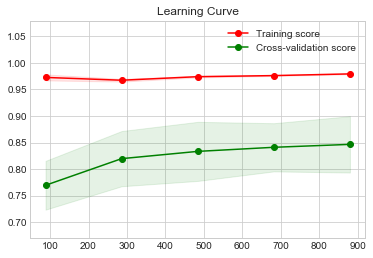

In [73]:
from sklearn.model_selection import StratifiedKFold, learning_curve
train_sizes, train_scores, validation_scores = learning_curve(rfreg_model, X_train_select,y_trainmodel.values.ravel(),cv=10)
plot_learning_curve(train_sizes, train_scores, validation_scores)

In [85]:
param_grid = {"n_estimators": [500],
    "max_depth": [3,5,7,10],
    
    "min_samples_split": [3,5,7],
    "min_samples_leaf": [3,5,7],
    "max_features":[30]
             }

model = RandomForestRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

grid.fit(X=X_train_select, y = y_trainmodel)

print(grid.best_score_)
print(grid.best_params_)
best_model = grid.best_estimator_
print(best_model)

0.839491784035
{'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 10, 'n_estimators': 500, 'max_features': 30}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


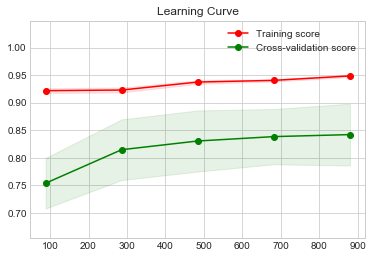

In [86]:
train_sizes, train_scores, validation_scores = learning_curve(best_model, X_train_select,y_trainmodel.values.ravel(),cv=10)
plot_learning_curve(train_sizes, train_scores, validation_scores)

In [87]:
y_pred_val= best_model.predict(X= X_val_select)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(y_val)-1,np.exp(y_pred_val),False))


RMSLE Value For Random Forest:  0.150982738159


In [ ]:
y_pred_result = best_model.predict(X=X_test_select)

In [ ]:
checkpoint

In [ ]:
y_pred_result = np.exp(y_pred_result)-1
print(y_pred_result[1:10])
FORMAT = '%Y%m%d%H%M%S'
timestamp=datetime.datetime.now().strftime(FORMAT)
filename ="submission_housing"+timestamp+"_out.csv"
submission = pd.DataFrame({
        "Id": test_Id,
        "SalePrice": y_pred_result
    })
submission.to_csv(filename, index=False)
